how about we write a not-confusing permutation test for christ's sake

In [1]:
# get all liver specific genes as defined by HPA 

# intersect this with the DEG (either up or down)

# get the cell type specific genes

# get the cell type speciifc genes in DEG

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#For editable text. Except latex text is still shapes sadly
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)

#Set style
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [3]:
figSavePath = "/Users/kayaneh/Documents/deconvolution/figures/full_figure/supplement_revision1/"

In [4]:
giniLiver = pd.read_csv("~/Documents/deconvolution/livertox/liversig/gini6_perCluster_hepatocyte_12052020.csv",
                        sep = ",", index_col = 0)

ensgRef = pd.read_csv("~/Documents/quake/ref/ensg-transcript_biotype.txt",
                     sep = "\t", index_col = 0)

cellTypeSpecificGenes = giniLiver[['Hepatocytes-gini']].dropna(how = "all").index.tolist()

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# import the reference single cell data 
adata = sc.read_h5ad("/Users/kayaneh/Documents/deconvolution/livertox/liver-nadim-celltype.h5ad")

sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)

# this space is throwing an error downstream
adata.obs["cellTypes"] = adata.obs["Cell Types"] 

In [6]:
len(cellTypeSpecificGenes)

144

In [7]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300,
                bbox_inches = 'tight', transparent = True)

In [8]:
molecStethoDEG = pd.read_excel("Supplementary_File_1.xlsx",
                              sheet_name = "DESeq control vs NAFLD",
                              index_col = 0, skiprows = 1)


degUp = molecStethoDEG[molecStethoDEG["log2FoldChange"] > 0]
degUp = degUp[degUp["padj"] < 0.05]

degDown = molecStethoDEG[molecStethoDEG["log2FoldChange"] < 0]
degDown = degDown[degDown["padj"] < 0.05]


# cut the versions off the indices
degUpGenes = [i.split(".")[0] for i in degUp.index.tolist()]
degDownGenes = [i.split(".")[0] for i in degDown.index.tolist()]

degGenes = degUpGenes + degDownGenes
print(len(degGenes))

2498


In [9]:
# now get the bulk genes
# brain data from HPA
hpaBulk = pd.read_csv("/Users/kayaneh/Downloads/tissue_category_rna_liver_Tissue.tsv",
                       sep = "\t", index_col = [0])

hpaBulk["Gene name"] = hpaBulk.index.tolist()

# make the index of hpaBulk the ENSG codes
hpaBulk.set_index(["Ensembl"], inplace = True)

In [10]:
# hepatocyte specific genes and liver specific genes in HPA
hepatocyte_HPA = np.intersect1d(hpaBulk.index.tolist(), cellTypeSpecificGenes)
liver_HPA = np.setdiff1d(hpaBulk.index.tolist(), cellTypeSpecificGenes)

In [11]:
# intersect these with the DEG

In [12]:
# note that these are in ENSG; convert to gene name
hepatocyte_HPA_DEG = np.intersect1d(hepatocyte_HPA, degGenes)
liver_HPA_DEG = np.intersect1d(liver_HPA, degGenes)

In [13]:
print(len(liver_HPA_DEG))
print(len(hepatocyte_HPA_DEG))

203
93


In [14]:
def getGenesNSynonyms(geneList):
    geneNames = ensgRef.loc[geneList]["Gene name"].dropna().values.tolist()
    #geneSynon = ensgRef.loc[geneList]["Gene Synonym"].dropna().values.tolist()
    geneSynon = []
    
    allGenes = geneNames + geneSynon
    allGenes = np.unique(allGenes)
    return(allGenes)

In [15]:
hepatocyte_HPA_DEG_geneNames = getGenesNSynonyms(hepatocyte_HPA_DEG)
liver_HPA_DEG_geneNames = getGenesNSynonyms(liver_HPA_DEG)

In [16]:
hepatocyte_HPA_DEG_geneNames

array(['ACSM2A', 'ADH1A', 'ADH1B', 'ADH4', 'ADH6', 'AFM', 'AGXT', 'AHSG',
       'AKR1C4', 'AKR1D1', 'ALDH1L1', 'ALDH8A1', 'ALDOB', 'ANG',
       'ANGPTL3', 'APOA1', 'APOC1', 'APOC3', 'APOC4-APOC2', 'APOE',
       'AQP9', 'ARG1', 'ATF5', 'BHMT', 'BHMT2', 'C8A', 'C8B', 'C9',
       'CES1', 'CFB', 'CFH', 'CP', 'CPN2', 'CPS1', 'CYP1A2', 'CYP2C18',
       'CYP2C19', 'CYP2C8', 'CYP2C9', 'CYP2E1', 'CYP3A4', 'CYP4A11',
       'CYP4F2', 'CYP4F3', 'CYP8B1', 'DPYS', 'F2', 'FABP1', 'FGB', 'FMO3',
       'G6PC', 'GHR', 'GLYAT', 'GLYATL1', 'HAMP', 'HAO1', 'HGD', 'HMGCS2',
       'HPD', 'HPX', 'HRG', 'HSD17B6', 'ITIH1', 'ITIH3', 'KLKB1', 'KNG1',
       'LECT2', 'MAT1A', 'MT1G', 'MTTP', 'PON1', 'PON3', 'PRG4', 'RGN',
       'SAA4', 'SCD', 'SDS', 'SERPINA10', 'SERPINC1', 'SERPIND1',
       'SERPINF2', 'SLC10A1', 'SLC22A1', 'SLC38A4', 'SLC7A2', 'SULT2A1',
       'TAT', 'TDO2', 'TFR2', 'TTR', 'UGT2B10', 'UGT2B4', 'UGT2B7'],
      dtype='<U11')

In [17]:
adataBulk = adata[:,list(np.intersect1d(liver_HPA_DEG_geneNames, adata.var_names))]
adataCT = adata[:, list(np.intersect1d(hepatocyte_HPA_DEG_geneNames, adata.var_names))]

In [18]:
len(hepatocyte_HPA_DEG)

93

In [19]:
adataCT

View of AnnData object with n_obs × n_vars = 10372 × 93
    obs: 'Cluster', 'Cell Types', 'cellTypes'
    uns: 'log1p'

In [20]:
len(liver_HPA_DEG)

203

In [21]:
adataBulk

View of AnnData object with n_obs × n_vars = 10372 × 194
    obs: 'Cluster', 'Cell Types', 'cellTypes'
    uns: 'log1p'

In [52]:
# go through the adata and filter 

def getGini(incomeList):
    incomeList = np.sort(incomeList) # convert list to ascending order
    numerator = 0
    numSamps = len(incomeList)
    denominator = numSamps * np.sum(incomeList)
    for i, elem in enumerate(incomeList):
        # account for the fact that this is zero indexed, but the summation in the equation is indexed 1 -> n :-)
        numerator +=  (i + 1) * elem 
    gini = (2 * numerator)/(denominator) - ((numSamps + 1) / numSamps)
    return(gini)

def giniGeneList(geneList, bulkRef):
    res = pd.DataFrame(index = geneList)
    giniList = []
    for gene in geneList:
        # so the problem is that the way genes -> ensg were derived, we might have multiple ensg/gene
        # hence, if not protein coding, we might not find in HPA and get an error
        # so we check that first
        if gene not in bulkRef.index:
            print(gene, " not in HPA ref")
            continue
        incomeList = bulkRef.loc[gene].dropna().tolist() # list of NX expression of that gene across all tissues
        geneGini = getGini(incomeList)
        giniList += [geneGini]
    res = pd.DataFrame(index = geneList, data = giniList)
    res.columns = ["Gini Index"]
    return(res)

convert to gene names in a given list and then work with the single cell data

In [53]:
# get genes + synonyms off HPA data
def genesNSynon_HPA(hpaDF):
    genes = hpaDF["Gene name"].values.tolist()
    synon = hpaDF["Gene synonym"]
    synon = synon.dropna().tolist()
    # now flatten synon
    synon = [i.split(", ") if ", " in i else i for i in synon] # this is a list of genes and lists of genes
    flatSynon = []
    for i in synon:
        if type(i) != list: flatSynon += [i]
        else:
            for j in i:
                flatSynon += [j]
    # tack on genes to flatSynon
    flatSynon += genes
    return(genes)

In [54]:
# function that returns the gini coefficients in the adata based on the average
# expression of a given gene
# code inspired by: https://scanpy.discourse.group/t/how-to-calculate-the-average-gene-expression-within-each-cluster/126

# @param adata is the subsetted adata with the genes of interest
def getClusterAvgGini(adata):
    averageDF = pd.DataFrame(columns = adata.var_names, 
                   index = adata.obs['cellTypes'].cat.categories)           

    for clust in adata.obs.cellTypes.cat.categories: 
        averageDF.loc[clust] = adata[adata.obs['cellTypes'].isin([clust]),:].X.mean(0)

    averageDF = averageDF.T
    scGini = giniGeneList(averageDF.index, averageDF)
    return(scGini, averageDF)

In [55]:
giniBulk, bulkAvgDF = getClusterAvgGini(adataBulk)
giniCT, ctAvgDF = getClusterAvgGini(adataCT)

In [56]:
giniBulk["type"] = "liver"
giniCT["type"] = "cell type"

In [57]:
allGini = pd.concat([giniBulk, giniCT])

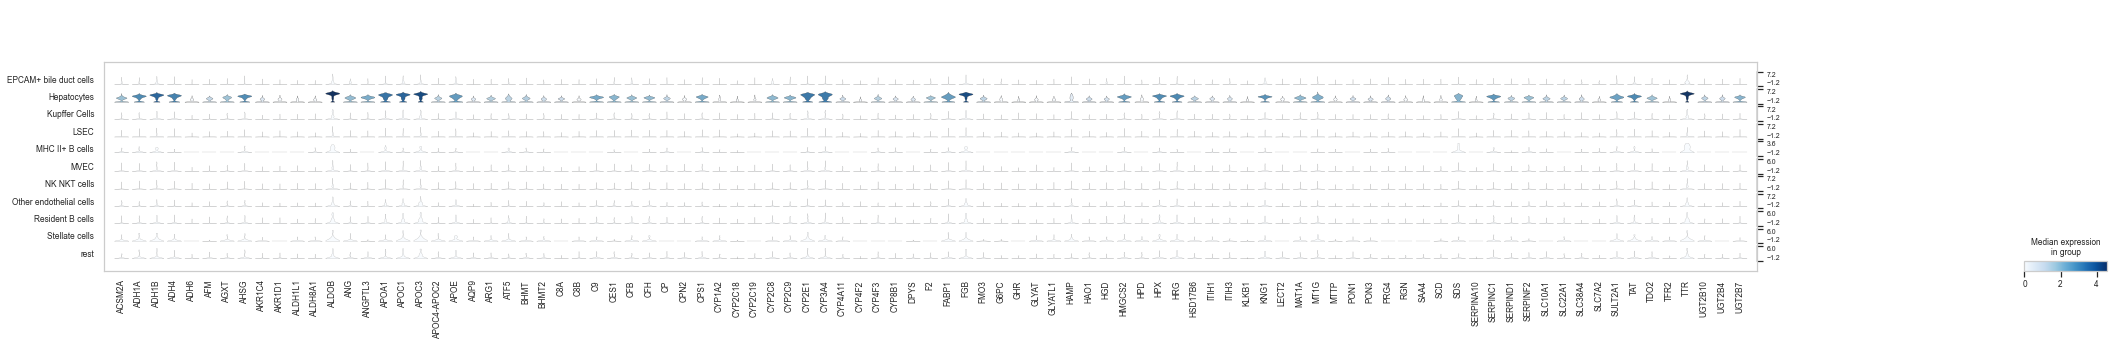

In [58]:
sc.pl.stacked_violin(adataCT, hepatocyte_HPA_DEG_geneNames,
                     groupby='cellTypes', yticklabels = True)

In [59]:
ctAvgDF.loc["TTR"]

EPCAM+ bile duct cells     0.820042
Hepatocytes                 3.80996
Kupffer Cells              0.921371
LSEC                       0.452741
MHC II+ B cells              0.8184
MVEC                       0.568723
NK NKT cells               0.733577
Other endothelial cells    0.678038
Resident B cells           0.944357
Stellate cells             0.602298
rest                       0.612066
Name: TTR, dtype: object

In [60]:
giniBulk.sort_values(ascending = False, by = "Gini Index")

,Gini Index,type
TMPRSS9,0.909091,liver
CIDEB,0.769390,liver
THRSP,0.747985,liver
SPDYC,0.741364,liver
TRIM10,0.701491,liver
...,...,...
NUGGC,0.151491,liver
IL32,0.150861,liver
SFXN1,0.123809,liver
LDHA,0.106458,liver


In [61]:
my_pal = {"cell type": "#6d597a", "liver": "#893168"}

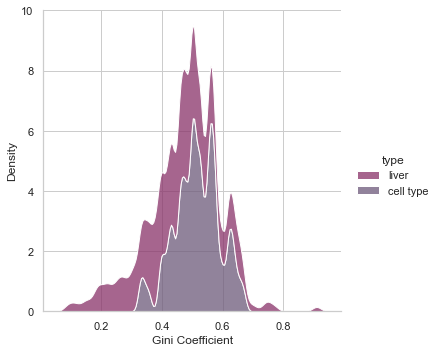

In [62]:
g = sns.displot(data = allGini, hue = "type", x= "Gini Index",
            palette = my_pal,
            bw_adjust=.3,
            kind = "kde", 
            common_norm = False, 
            multiple = "stack")
g.set(xlabel = "Gini Coefficient")

In [66]:
allGini.loc["CYP3A4"][["Gini Index", "type"]]

Gini Index     0.498091
type          cell type
Name: CYP3A4, dtype: object

In [67]:
#save_figure_pdf(g, figSavePath + "degComparison_cellTypeVsLiver_giniDistrib_09062021.pdf")

In [68]:
cellTypeGiniMean = allGini[allGini["type"] == "cell type"]["Gini Index"].mean()
brainGiniMean = allGini[allGini["type"] == "liver"]["Gini Index"].mean()
actualEffectSize = cellTypeGiniMean - brainGiniMean
actualEffectSize

0.0756665873693797

In [69]:
print("cell type gini mean = ", cellTypeGiniMean)
print("liver gini mean = ", brainGiniMean)

cell type gini mean =  0.5142429879832162
liver gini mean =  0.4385764006138365


In [70]:
np.random.seed(10)
allGiniVals = allGini["Gini Index"].values.tolist()

newGiniDF = pd.DataFrame()
for i in range(10000):
    
    newGiniDF["Permuted Gini Trial " + str(i)] = np.random.permutation(allGiniVals)

newGiniDF["values"] = allGini["type"].tolist()

In [71]:
newGiniDF["original"] = allGiniVals

In [72]:
averagesPerTrial = newGiniDF.groupby(["values"]).mean().T
diffs = (averagesPerTrial["cell type"] - averagesPerTrial["liver"]).values

In [73]:
len(np.where(diffs >= diffs[-1])[0])/len(diffs)

9.999000099990002e-05

In [74]:
x =  9.999000099990002 * 10 ** -5

In [75]:
x < 10 ** -4 

True

# do the hypergeometric test on all differentially expressed genes

In [76]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

In [77]:
cfRNADEG_inCellType = np.intersect1d(cellTypeSpecificGenes, degGenes)

In [78]:
len(cfRNADEG_inCellType)

93

In [79]:
[M, n, N] = [adata.var.shape[0], len(cellTypeSpecificGenes), len(degGenes)]

rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_intersection = rv.pmf(x)

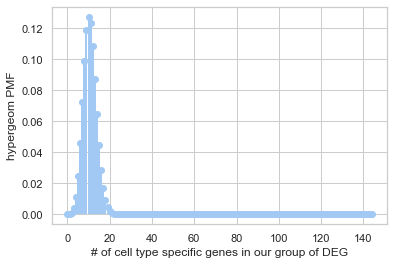

In [80]:
fig = plt.figure()
>>> ax = fig.add_subplot(111)
>>> ax.plot(x, pmf_intersection, 'bo')
>>> ax.vlines(x, 0, pmf_intersection, lw=2)
>>> ax.set_xlabel('# of cell type specific genes in our group of DEG')
>>> ax.set_ylabel('hypergeom PMF')
>>> plt.show()

In [81]:
# CDF is up to 93, you want greater than, so take the complement
1  - hypergeom.cdf(len(cfRNADEG_inCellType), M, n, N)

6.040157263242918e-11

In [82]:
6.040157263242918e-11 < 10 ** -10

True

In [50]:
clear all